In [18]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/kirill/Projects/NIR')
import myutils
import numpy as np
import matplotlib.pylab as plt
from pomegranate import *
import pandas as pd
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
frame = pd.read_csv('kdd_float.csv',index_col = None)
frame.columns = range(0,42)
frame.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [90]:
frame.dtypes

0       int64
1      object
2      object
3      object
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16      int64
17      int64
18      int64
19      int64
20      int64
21      int64
22      int64
23      int64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41     object
dtype: object

In [7]:
frame.shape

(494021, 42)

In [8]:
frame = frame[:100000]

20


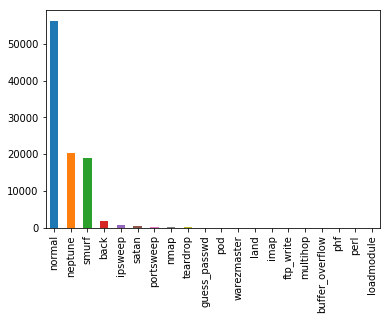

In [16]:
frame[41].value_counts().plot.bar()
print(len(frame[41].unique()))

In [104]:
idx = [x for x in range(5,41)]
idx = [10,31,32]
data = frame[idx]
target = frame[41]
print(target[:4])

0    normal
1    normal
2    normal
3    normal
Name: 41, dtype: object


In [105]:
states = {}
for i,elem in enumerate(target.unique()):
    states[elem] = i
print(states)

y_train = []
for x in target:
    y_train+=[states[x]]
y_train = list(map(str,y_train))
y_train = list(map(myutils.rename_state,y_train))
print(y_train[:10])
x_train = data.values.tolist()
print(len(x_train), len(y_train))

{'normal': 0, 'buffer_overflow': 1, 'loadmodule': 2, 'perl': 3, 'neptune': 4, 'smurf': 5, 'guess_passwd': 6, 'pod': 7, 'teardrop': 8, 'portsweep': 9, 'ipsweep': 10, 'land': 11, 'ftp_write': 12, 'back': 13, 'imap': 14, 'satan': 15, 'phf': 16, 'nmap': 17, 'multihop': 18, 'warezmaster': 19}
['s0', 's0', 's0', 's0', 's0', 's0', 's0', 's0', 's0', 's0']
100000 100000


In [106]:
model = HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components = 20,X = [x_train],
                                       labels=[y_train],algorithm='labeled' )
model

{
    "class" : "HiddenMarkovModel",
    "name" : "None",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "MultivariateGaussianDistribution",
                "parameters" : [
                    [
                        0.0003378618678426631,
                        133.05384451241198,
                        223.44160324347393
                    ],
                    [
                        [
                            0.0010134714528862471,
                            -0.0019208877895979001,
                            -0.07065563805437805
                        ],
                        [
                   

In [50]:
y_train

['normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',

In [97]:
a = MultivariateGaussianDistribution([2,2])

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [123]:
cov = [[0.5, -0.8], [2.4, 4.7]]
a = (np.random.randn(500, 2) + [10, -1.5]).dot( cov )

In [130]:
a = np.random.randn(5000,2)

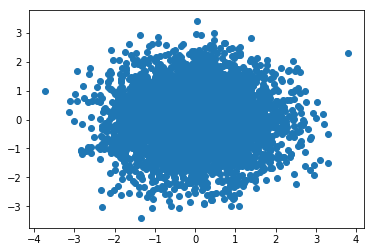

In [131]:
plt.scatter(a[:,0],a[:,1])

In [132]:
model = HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components = 1,X = [a])

In [133]:
model

{
    "class" : "HiddenMarkovModel",
    "name" : "None",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "MultivariateGaussianDistribution",
                "parameters" : [
                    [
                        -0.023318890044638052,
                        -0.01354855027119216
                    ],
                    [
                        [
                            0.9841027651704594,
                            -0.0059228594900129165
                        ],
                        [
                            -0.0059228594900129165,
                            0.9663854557561384
               